## Requirements

In [1]:
import sympy
from sympy import init_printing

Enable pretty printing in this notebook.

In [2]:
init_printing()

In [3]:
import sys

## Numbers and symbols

### Rational numbers

In [4]:
from sympy import Rational

In sympy you can work with rational numbers (or fractions).  The arithmetic opeerations are defined on them so that you have no problems with round off errors.

In [5]:
a = Rational(1, 3)
b = Rational(3, 4)
a, b

In [6]:
a + b

In [7]:
a*b

In [8]:
from sympy import sqrt
import math

In [9]:
a = sqrt(5)
b = math.sqrt(5)
a, b

In [10]:
a**2 == b**2

False

In [11]:
a**2

In [12]:
print(f'{b**2}')

5.000000000000001


### Complex numbers

In [13]:
from sympy import sqrt, re, im, I, simplify, conjugate

Although Python natively supports complex numbers, sympy has its own implementation.  Whereas you would write the complex number $3 + 5i$ as `3 + 5j` in Python, you would use `3 + 5*I` in sympy.

In [14]:
a = 3 + 5*I
b = 7 - 3*I
a, b

The functions `re` and `im` will return the real and imaginry part of a complex number, while the `conjugate` function compute, well, the conjugate.

In [15]:
im(a)

In [16]:
re(a)

In [17]:
conjugate(a)

Of course, you can apply the usual arithmetic operators to sympy complex numbers as you would expect.

In [18]:
a + b

In [19]:
a*b

In [20]:
simplify(a*b)

In [21]:
sqrt(a)

### Symbols

In [22]:
from sympy import symbols

It is also possible to work with symbols in sympy (and that is of course where it derives its name from).

In [23]:
a, b, x, y = symbols('a b x y')

In [24]:
expr = a*x + b
expr

In this expression, we can substitute $y/a$ for $x$:

In [25]:
expr.subs(x, y/a)

Doing symbolic computations is the main reason to use sympy.  For purely numerical computations, you are better of using numpy/scipy or similar libraries.

## Linear algebra

In [26]:
from sympy.solvers import solve

You can use sympy to solve equations and sets of linear equations.

In [27]:
x, y, z = symbols('x, y, z')

### Solving equations

We can solve (non)linear equations easily using sympy, e.g.,
$$
    3x^2 - 7x + 5 = 0
$$
This quadratic equation has two complex roots.

In [28]:
solve(3*x**2 - 7*x + 5, x)

These solutions can be stored in a variable, e.g., `result`, and we can use them in further computations such as computing the product of the solutions.

In [29]:
result = solve(3*x**2 - 7*x + 5, x)

In [30]:
type(result)

list

In [31]:
result[0]*result[1]

### Solving sets of linear equations

The `solve` function is quite versatile, you can also solve sets of linear equations.
$$
    \begin{array}{rcl}
        3x + 5y - z/2 & = & 5 \\
        -x + 3y + 5z  & = & 3 \\
        4x - 7y + 2z  & = & 1
    \end{array}
$$

In [32]:
solve([
    3*x + 5*y - z/2 - 5,
    -x + 3*y + 5*z -3,
    4*x - 7*y + 2*z - 1,
], [x, y, z])

You can use these solutions by storing them in a variable, e.g., `solutions`.  This is a Python dictionary that can be used to substitute the values in other expressions.

In [33]:
solutions = solve([
    3*x + 5*y - z/2 - 5,
    -x + 3*y + 5*z -3,
    4*x - 7*y + 2*z - 1,
], [x, y, z])

In [34]:
type(solutions)

dict

In [35]:
expr = x**2 + 3
expr.subs(solutions)

### Vectors and matrices

In [36]:
from sympy import Matrix

#### Definition

Vectors and matrices can be easily defined starting from list (of lists) of their elements, e.g.,
$$
    A = \left(
        \begin{array}{ccc}
            3 & 5 & -1 \\
            2 & 5 & 4
        \end{array}
    \right)
$$

In [37]:
A = Matrix([
    [3, 5, -1],
    [2, 5, 4],
])

It is easy to check the dimensions of a matrix using its `shape` attribute.  The result is a `tuple`, e.g., the matrix `A` has 2 rows and 3 columns.

In [38]:
A.shape

Vectors are simply special cases of matrices, so defining a row vector is easy.

In [39]:
v_row = Matrix([[2, -5, 3]])

In [40]:
v_row.shape

So a row vector is simply a matrix with a single row.

The most convenient way to define a column vector is by transposing a row vector.

In [41]:
v_col = Matrix([[-1, 3, 0]]).transpose()

In [42]:
v_col.shape

A column vector is a matrix with one element per row.

It is also possible to create a matrix using a function that takes the indices as arguments, and computes the value of the corresponding matrix element.

In [43]:
Matrix(3, 3, lambda i, j: 3*i + (j + 1))

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

#### Special matrices

There are easy ways to define special matrices.

In [44]:
from sympy import eye, ones, zeros

The identity matrix:

In [45]:
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

A matrix with all elements equal to 1:

In [46]:
ones(3, 2)

⎡1  1⎤
⎢    ⎥
⎢1  1⎥
⎢    ⎥
⎣1  1⎦

A matrix with all elements equal to 0:

In [47]:
zeros(4, 3)

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

#### Operations

In [48]:
A = Matrix([
    [3, 5, -1],
    [2, 5, 4],
])

In [49]:
B = Matrix([
    [-3, 2, 6],
    [3, 7, 4],
])

The standard operations such as addition, substraction and multiplication are straightforward.

In [50]:
A + B

⎡0  7   5⎤
⎢        ⎥
⎣5  12  8⎦

In [51]:
2*A + B

⎡3  12  4 ⎤
⎢         ⎥
⎣7  17  12⎦

In [52]:
C = Matrix([
    [3, 2],
    [-3, 9],
    [2, 0],
])

In [53]:
A*C

⎡-8  51⎤
⎢      ⎥
⎣-1  49⎦

If the dimensions of the matrices don't match for multiplication, you get an error.

In [54]:
try:
    A*B
except Exception as e:
    print(e, file=sys.stderr)

Matrix size mismatch: (2, 3) * (2, 3).


In [55]:
v_col = Matrix([[-1, 3, 0]]).transpose()

In [56]:
A*v_col

⎡12⎤
⎢  ⎥
⎣13⎦

There are methods defined to compute the determinant and the inverse of matrices.

In [57]:
D = Matrix([[3, 5], [7, 23]])

In [58]:
D.det()

In [59]:
D.inv()

⎡ 23         ⎤
⎢ ──    -5/34⎥
⎢ 34         ⎥
⎢            ⎥
⎣-7/34  3/34 ⎦

#### Symbolic matrices

It is of course possible to define matrices that contain symbols, e.g.,

In [60]:
a, b, c, d = symbols('a, b, c, d')

In [61]:
D = Matrix([
    [a, b],
    [c, d],
])

In [62]:
D

⎡a  b⎤
⎢    ⎥
⎣c  d⎦

You can perform any matrix operation on matrices that contain symbols, e.g., $D^2$.

In [63]:
D**2

⎡ 2                  ⎤
⎢a  + b⋅c   a⋅b + b⋅d⎥
⎢                    ⎥
⎢                  2 ⎥
⎣a⋅c + c⋅d  b⋅c + d  ⎦

Of course, you can use any Python programming construct in order to create sympy symbols.  Here we create the elements for a $3 \times 3$ matrix using the `symbols` function and a Python f-string.

In [64]:
e = sympy.IndexedBase('e')
E = Matrix(3, 3, lambda i, j: e[i+1, j+1])
E

⎡e[1, 1]  e[1, 2]  e[1, 3]⎤
⎢                         ⎥
⎢e[2, 1]  e[2, 2]  e[2, 3]⎥
⎢                         ⎥
⎣e[3, 1]  e[3, 2]  e[3, 3]⎦

Using the `det` method, we can now easily recover the formula for the determinant of a $3 \times 3$ matrix.

In [65]:
E.det()

Similarly, for the inverse of a $2 \times 2$ matrix.

In [66]:
D.inv()

⎡    d         -b    ⎤
⎢─────────  ─────────⎥
⎢a⋅d - b⋅c  a⋅d - b⋅c⎥
⎢                    ⎥
⎢   -c          a    ⎥
⎢─────────  ─────────⎥
⎣a⋅d - b⋅c  a⋅d - b⋅c⎦

#### Selecting parts of matrices

It is of course easy to select elements from a matrix, e.g.,
$$
    A = \left(
        \begin{array}{ccc}
            3 & 5 & -1 \\
            2 & 5 & 4
        \end{array}
    \right)
$$

In [67]:
A = Matrix([
    [3, 5, -1],
    [2, 5, 4],
])

For instance, selecting the first row and second column element.  Note that indices are zero-based (rather than one-based, as you are used to in mathematics).

In [68]:
A[0, 1]

Selecting rows or columns can be achieved by slicing, or using the `row` and `col` methods

In [69]:
A[:, 2]

⎡-1⎤
⎢  ⎥
⎣4 ⎦

In [70]:
A.col(2)

⎡-1⎤
⎢  ⎥
⎣4 ⎦

Submatrices can be selected from a matrix using slicing.

In [71]:
C = Matrix(3, 4, lambda i, j: 4*i + (j + 1))

In [72]:
C

⎡1  2   3   4 ⎤
⎢             ⎥
⎢5  6   7   8 ⎥
⎢             ⎥
⎣9  10  11  12⎦

In [73]:
C[1:3, 1:3]

⎡6   7 ⎤
⎢      ⎥
⎣10  11⎦

### Eigen values and eigen vectors

In [74]:
a, b, c, d = symbols('a, b, c, d')

In [75]:
D = Matrix([
    [a, b],
    [c, d],
])

Computing the eigenvalues and eigenvectors is very easy.  Note that the eigenvalues are returned as a dictionary with the expression of the eigenvalue as the key, and its multiplicity as value.

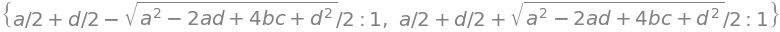

In [76]:
D.eigenvals()

The output of the `eigenvects` method is a bit more complicated, it is a list of tuples, one per eigenvalue.  Each tuple contains the eigenvalue, its multiplicity, and the corresponding eigenvector itself.

In [77]:
D.eigenvects()

⎡⎛                                         ⎡⎡                 ________________
⎢⎜           _________________________     ⎢⎢                ╱  2             
⎢⎜          ╱  2                    2      ⎢⎢      a   d   ╲╱  a  - 2⋅a⋅d + 4⋅
⎢⎜a   d   ╲╱  a  - 2⋅a⋅d + 4⋅b⋅c + d       ⎢⎢      ─ + ─ - ───────────────────
⎢⎜─ + ─ - ────────────────────────────, 1, ⎢⎢  d   2   2                2     
⎢⎜2   2                2                   ⎢⎢- ─ + ───────────────────────────
⎢⎜                                         ⎢⎢  c                    c         
⎢⎜                                         ⎢⎢                                 
⎣⎝                                         ⎣⎣                    1            

_________⎤⎤⎞  ⎛                                         ⎡⎡                 ___
       2 ⎥⎥⎟  ⎜           _________________________     ⎢⎢                ╱  2
b⋅c + d  ⎥⎥⎟  ⎜          ╱  2                    2      ⎢⎢      a   d   ╲╱  a 
─────────⎥⎥⎟  ⎜a   d   ╲╱  a  - 2⋅a⋅d + 4⋅b⋅c + d  

## Plotting

In [78]:
from sympy import sinh, cosh, tanh
from sympy.abc import x
from sympy.plotting import plot

Python has many package to create beautiful plots, e.g., matplotlib, plotly, bokeh, but sympy offers some interesting features to plot functions.

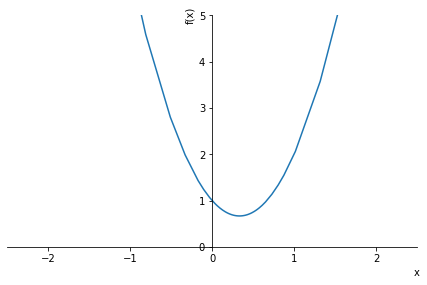

In [79]:
plot(3*x**2 - 2*x + 1, xlim=(-2.5, 2.5), ylim=(0, 5));

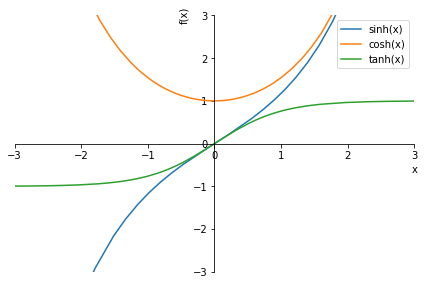

In [80]:
plot(sinh(x), cosh(x), tanh(x), xlim=(-3, 3), ylim=(-3, 3), legend=True);

## Calculus

### Derivatives

In [81]:
a, b, c, x = symbols('a b c x')

Consider the expression $a x^2 + b x + c$, we can easily compute the derivative of expressions with respect to the variable $x$.

In [82]:
expr = a*x**2 + b*x + c

In [83]:
expr.diff(x)

Partial derivaties and multiple derivatives are of course also supported and easy to compute.

In [84]:
x, y = symbols('x y')

In [85]:
expr = x**2 + 3*x*y + 2*y**3

In [86]:
expr.diff(y)

 ### Integrals

In [87]:
a, b, c, t, t_min, t_max = symbols('a b c t t_min t_max')

Consider the expression $a t^2 + b t + c$, we can easily compute the indefinite integral.

In [88]:
expr = a*t**2 + b*t + c

In [89]:
expr.integrate(t)

Note that the indefinite integral doesn't add the constant as you might expect.

Definite integrals can also be easily done.

In [90]:
expr.integrate((t, t_min, t_max))

### Limits

In [91]:
from sympy import limit, sin
from sympy.abc import x

You can use sympy to derive limits for expressions, e.g.,
$$
    \lim_{x \to 0} \frac{\sin(x)}{x}
$$

In [92]:
limit(sin(x)/x, x, 0)

The limit for this expression is 1, as expected.

### Series expansion

In [93]:
from sympy import cos, series, sin

In [94]:
x, a = symbols('x a')

In [95]:
expr = sin(a*x)/x

In [96]:
expr2 = series(expr, x, 0, n=7)
expr2

A term of a specific order in a given variable can be selected easily.

In [97]:
expr2.taylor_term(2, x)

When the order is unimportant, or when the expression should be used to define a function, the order term can be removed.

In [98]:
expr2.removeO()

Adding two series deals with the order correctly.

In [99]:
s1 = series(sin(x), x, 0, n=7)

In [100]:
s2 = series(cos(x), x, 0, n=4)

In [101]:
s1 + s2

### Solving differential equations

In [102]:
from sympy import Derivative, Eq, Function, pi, Symbol
from sympy.plotting import plot
from sympy.solvers.ode import dsolve

The sympy `dsolve` function is quite powerful to symbolically solve differential equations.  For example, consider the second order ordinary differential equation:
$$
    \frac{d^2 \theta}{dx^2}(t) = -f^2 \theta(t)
$$
We denote the derivatie of the function $\theta(t)$ as $\omega(t)$.  The initial conditions are given by:
$$
    \begin{cases}
        \theta(0) = \theta_0 \\
        \omega(0) = 0
    \end{cases}
$$
    
Note that we make sure that the variables are annotated with appropriate attributes.

In [103]:
t = symbols('t', real=True)
f = Symbol('f', real=True, positive=True)
θ = Function(r'\theta')
θ_0 = Symbol(r'\theta_0', real=True)
equation = Derivative(θ(t), t, t) + f**2*θ(t)

The `dsolve` function can be used to find a solution.

In [104]:
solution = dsolve(equation, θ(t))
solution

In [105]:
type(solution)

sympy.core.relational.Equality

The solution is a sympy `Equality`, it is easier to work simply with the right hand side.

In [106]:
expr = solution.rhs

We will need the constants $C_1$ and $C_2$ to solve for them using the initial conditions.

In [107]:
C_1, C_2 = sorted(tuple(expr.atoms() - equation.atoms()), key=str)
C_1, C_2

Use the initial condition on $\theta(t)$ to solve for $C_2$.

In [108]:
init_2 = solve(expr.subs(t, 0) - θ_0, C_2, dict=True)[0]

Use the initial condition on $\omega(t)$ to solve for $C_1$.

In [109]:
init_1 = solve(expr.diff(t).subs(t, 0), C_1, dict=True)[0]

Now we get the final solution by substituting $C_1$ and $C_2$.

In [110]:
θ_sol = expr.subs(init_1).subs(init_2)
ω_sol = θ_sol.diff(t)
θ_sol, ω_sol

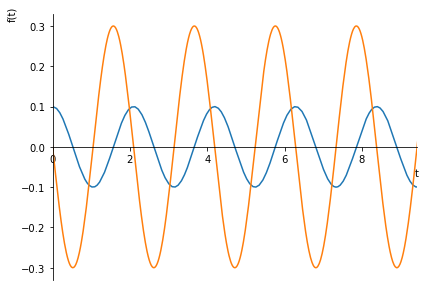

In [111]:
plots = plot(θ_sol.subs({f: 3.0, θ_0: 0.1}), xlim=(0.0, 3*pi), show=False)
plots.append(plot(ω_sol.subs({f: 3.0, θ_0: 0.1}), xlim=(0.0, 3*pi), show=False)[0])
plots.show()

## Expression manipulation

In [112]:
from sympy.core.add import Add
from sympy.core.mul import Mul, Pow
from sympy import epath, expand, factor, log, sqrt, symbols

### Anatomy of expressions

Define a number of symbols to work with, as well as an example expression.

In [113]:
x, y, a, b, c = symbols('x y a b c')

In [114]:
expr = (a*x**2 - b*y**2 + 5)/(c*x + y)

Check the expression's type.

In [115]:
expr.func

sympy.core.mul.Mul

Although the expression was defined as a divisino, it is represented as a multiplicatino by `sympy`.  The `args` attribute of an expressions stores the operands of the top-level operator.

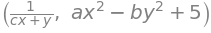

In [116]:
expr.args

Although the first factor appears to be a division, it is in fact a power.  The denominator of this expression would be given by:

In [117]:
expr.args[0].func

sympy.core.power.Pow

In [118]:
expr.args[0].args[0]

The expression $\frac{1}{a x + b}$ can alternatively be defined as follows, which highlights the internal representation of expressions.

In [119]:
expr = Pow(Add(Mul(a, x), b), -1)
expr

In [120]:
expr.args

In [121]:
expr.args[0].args[0]

This may be a bit surprising when you look at the mathematical representation of the expression, but the order of the terms is different from its rendering on the screen.

In [122]:
expr.args[0].args

Since the addition operation is commutative, this makes no difference mathematically.

In [123]:
expr.args[0].args[1].args

The `epath` function can also be used to access subexpressions.  Consider the following expression:

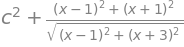

In [124]:
expr = c**2 + ((x + 1)**2 + (x - 1)**2)/sqrt((x - 1)**2 + (x + 3)**2)
expr

If we want to get the argument of the square root function, we can use a path expression:

In [125]:
epath('/[1]/[1]/[0]', expr)

The expression `'/[1]/[1]/[0]'` extracts the second term of the top level expression (i.e., the sum), the second factor in that term (i.e., the denominator) and the first argument of the square root function.

### Manipulation

Most expression manipulation algorithms can be called as functions, or as methods on expressions.

#### Substitution

It is very easy to substitute variables or parts of expressions by other expressions, e.g.,

In [126]:
expr = x**2 + 2*a*x + y**2

In [127]:
expr.subs(y, a)

In [128]:
expr.subs(y**2, c)

#### Rewriting expressions

In [129]:
from sympy import log, sqrt

Factoring an expression is quite easy, either the the `factor` function, or the method applied to an expression.

In [130]:
expr = x**2 + 2*a*x + a**2
expr

In [131]:
factor(expr)

In [132]:
expr.factor()

The reverse operation can be achieved by the `expand` function, .e.g.,

In [133]:
expr = (a + c*x)**2
expr

In [134]:
expr.expand()

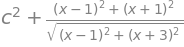

In [135]:
expr = c**2 + ((x + 1)**2 + (x - 1)**2)/sqrt((x - 1)**2 + (x + 3)**2)
expr

It is also possible to apply a function to part of an expression only, compare the following two statements.

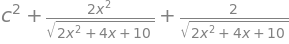

In [136]:
expr.expand()

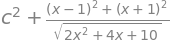

In [137]:
epath('/[1]/[1]/[0]', expr, expand)

The second statement uses `epath` to select a specific subexpression (the argument of the square root function) and applies the `expand` function only to that subexpression.

The `simplify` function or method can be very useful, but often requires some help.  You would expect $\sqrt{c^2}$ to be simplified to $c$, but that will not happen.

In [138]:
c = symbols('c')
expr = sqrt(c**2)
expr.simplify()

However, if we specify that `c` is real valued, we get the expected result.

In [139]:
c = symbols('c', real=True)
expr = sqrt(c**2)
expr.simplify()

Well, almost, indeed, `c` could be negative, so if we additionally specify that `c` is positive, we finally get what we intend.

In [140]:
c = symbols('c', real=True, positive=True)
expr = sqrt(c**2)
expr.simplify()

Similarly, $\log x + \log y$ can also only be simplified to $\log x y$ if both $x$ and $y$ are positive.

In [141]:
x, y = symbols('x y')
(log(x) + log(y)).simplify()

In [142]:
x, y = symbols('x y', positive=True)
(log(x) + log(y)).simplify()

In [143]:
x, y = symbols('x y', positive=True)
sympy.expand(log(x*y))

In [144]:
a, b, x = symbols('a b x')

In [145]:
expr = a*x**2 + 3*x + 5*x**2 + b*x + 6

In [146]:
expr.collect(x)

In [147]:
expr = (x**2 - 2*x + 1)/(x**2 - x)

In [148]:
expr.cancel()

In [149]:
expr = 1/((x - a)*(x + 3)*x)

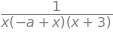

In [150]:
expr

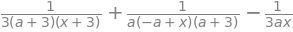

In [151]:
expr.apart(x)